In [67]:
#NAME: SARI SHREYA
#ROLL NO: HU21CSEN0300148
#DL_USECASE_1
#MARINE_VEHICLES

In [29]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import tensorflow as tf

In [11]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Check if TensorFlow is installed
try:
    import tensorflow as tf
    print("TensorFlow is already installed.")
except ImportError:
    # Install TensorFlow
    !pip install tensorflow
    print("TensorFlow has been installed.")

# Restart the Jupyter Notebook kernel to apply changes
from IPython.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


TensorFlow is already installed.


In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import the necessary modules and packages
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.utils import to_categorical
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
#to support jupyter
%matplotlib inline

In [4]:
#Contents of my main folder are 3 sub folders containing images
import os
main_folder_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study"
main_folder_contents = os.listdir(main_folder_path)
print(f'3 types of images: {main_folder_contents}')

3 types of images: ['cargo ships', 'military ships', 'recreational boats']


In [5]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


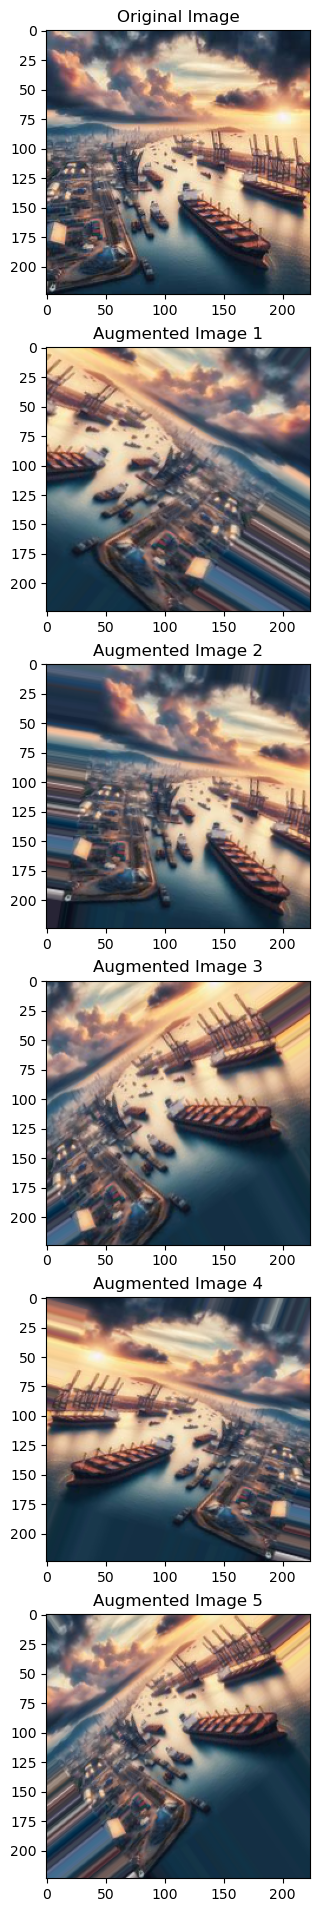

In [6]:
#this code implements augmentation of sample image of a ship from the "ships" sub folder, it is named as '677562.jpg'
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

sample_image_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study/cargo ships/bulk carriers1.jpeg"
sample_image = image.load_img(sample_image_path)  
img_array = image.img_to_array(sample_image)
img_array = np.expand_dims(img_array, axis=0)

#ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = []

for batch in datagen.flow(img_array, batch_size=1):
    augmented_images.append(image.array_to_img(batch[0]))
    if len(augmented_images) >= 5:  # Generate 5 augmented images
        break

#original and augmented images
plt.figure(figsize=(27, 4 * (len(augmented_images) + 1)))  # Adjust the height

#original image
plt.subplot(len(augmented_images) + 1, 6, 1)
plt.imshow(sample_image)
plt.title('Original Image')

# augmented image are then displayed on seperate lines for better visibility
for i, augmented_img in enumerate(augmented_images):
    plt.subplot(len(augmented_images) + 1, 6, 6 * (i + 1) + 1)
    plt.imshow(augmented_img)
    plt.title(f'Augmented Image {i + 1}')

#The augmentation includes random rotations, shifts, shearing, zooming, and horizontal flipping
plt.show()

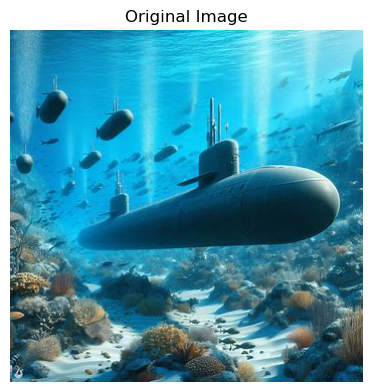

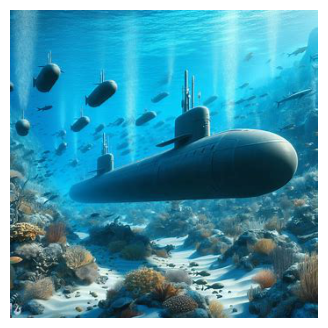

In [58]:
# load ship image '677562.jpg', converted to a NumPy array, visualized using Matplotlib
from PIL import Image
image_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study/military ships/submarines1.jpeg"
pil_image = Image.open(image_path)

#PIL image to NumPy array
image_array = np.array(pil_image)

#plot of original ship image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

#The second plot with interpolation (has smoothing effect applied by the 'hanning' interpolation)
plt.figure(figsize=(5, 4))
plt.imshow(image_array, interpolation='hanning')
plt.axis('off')
plt.show()


Text(0.5, 0.98, 'Original & RGB image channels')

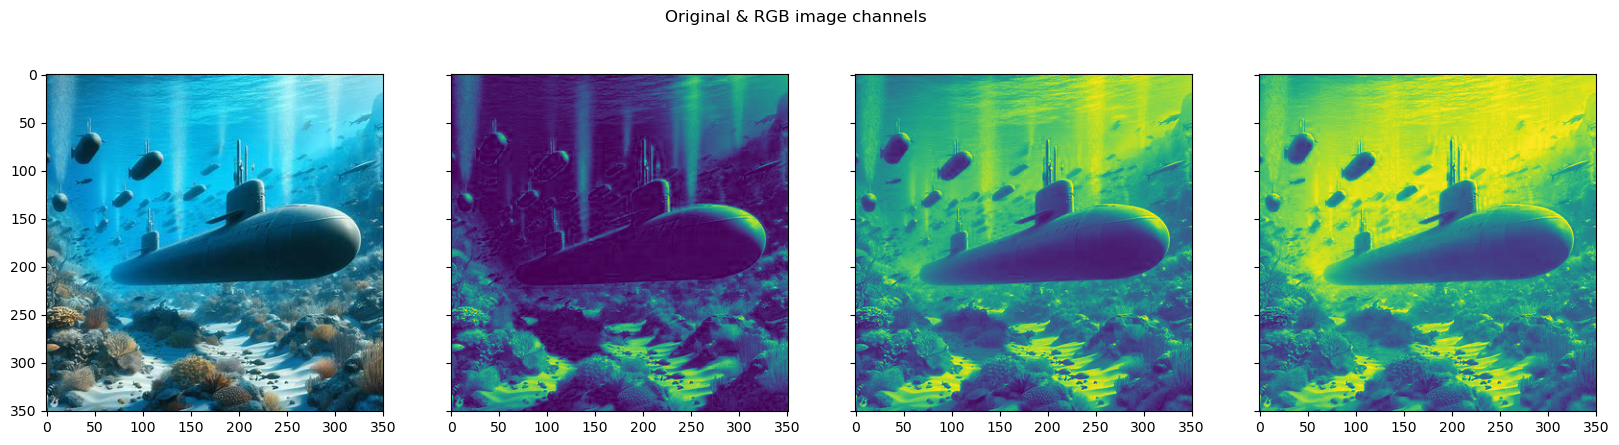

In [59]:
#a set of four subplots to visualize the original image '677562.jpg'  and its Red , Green and Blue channels separately
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image_array,interpolation='hanning')  #Original image
im2.imshow(image_array[:, : , 0],interpolation='hanning') #Red channel
im3.imshow(image_array[:, : , 1],interpolation='hanning') #Green channel
im4.imshow(image_array[:, : , 2],interpolation='hanning') #Blue channel
i.suptitle('Original & RGB image channels')

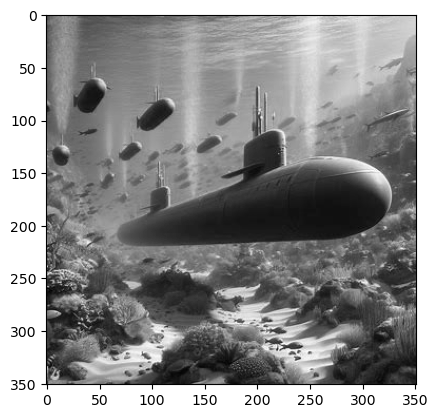

In [60]:
#convert the original RGB image to a grayscale image 
# used to visualize the intensity (luminance) of an image without considering color information
from skimage import io 
import skimage
gray_image = skimage.color.rgb2gray(image_array[:,:,:3])
plt.imshow(gray_image, cmap = 'gray',interpolation='hanning')

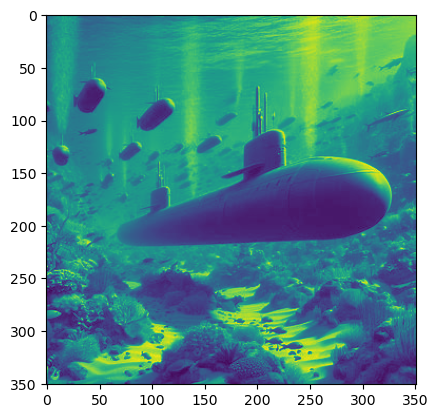

In [61]:
#normalizes the grayscale image to a range of [0, 1]
#to ensure that pixel values are within a standardized range.
# achieved by subtracting the minimum pixel value and dividing by the range between the minimum and maximum values

norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image,interpolation='hanning')

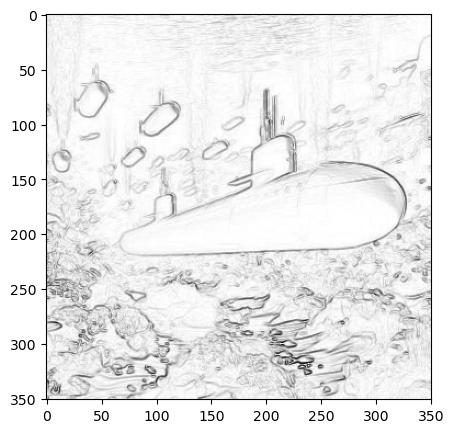

In [62]:
from skimage import io, filters, color, data
import os
plt.figure(figsize=(5,5))
img_sobel = filters.sobel(norm_image)
plt.imshow(1-img_sobel, cmap="gray")

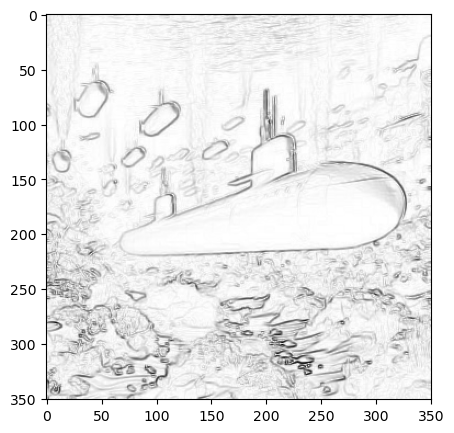

In [63]:
plt.figure(figsize=(5,5))
img_prewit = filters.prewitt(norm_image)
plt.imshow(1-img_prewit, cmap="gray")

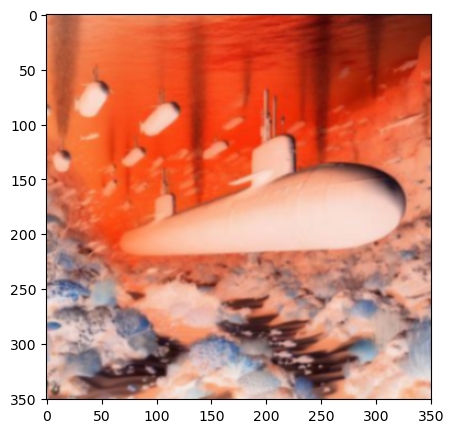

In [64]:
plt.figure(figsize=(5,5))
img_gau = filters.gaussian(image_array,channel_axis=-1)
plt.imshow(1-img_gau)

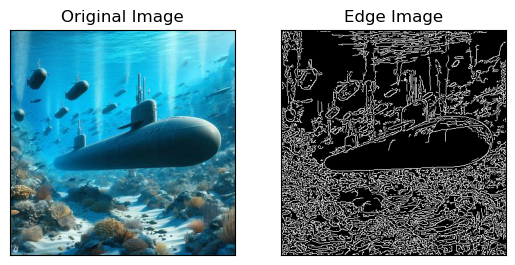

In [65]:
#canny edge detection
import cv2 as cv
def hist(histimg):
    ycrcb = cv.cvtColor(image_array, cv.COLOR_RGB2YCR_CB)
    channels = cv.split(ycrcb)
    cv.equalizeHist(channels[0], channels[0])
    cv.merge(channels, ycrcb)
    cv.cvtColor(ycrcb, cv.COLOR_YCR_CB2RGB, histimg)
    return histimg

dehizing = hist(norm_image)

edges = cv.Canny(image_array,50,100)

plt.subplot(121),plt.imshow(image_array,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [13]:
#class with thier corresponding population
print('_'*24)
print(f'  CLASS |\t COUNT|')
print('_'*24)
i = 0
class_names = []
counts = []
for Class in main_folder_contents:
    path = os.path.join(main_folder_path, Class)
    if os.path.isdir(path):
        Counts = len([file for file in os.listdir(path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))])
        i +=1
        print(f"{i}|{Class} |\t  {Counts} |")
        class_names.append(Class)
        counts.append(Counts)
    print('_'*24)

________________________
  CLASS |	 COUNT|
________________________
1|cargo ships |	  16 |
________________________
2|military ships |	  20 |
________________________
3|recreational boats |	  36 |
________________________


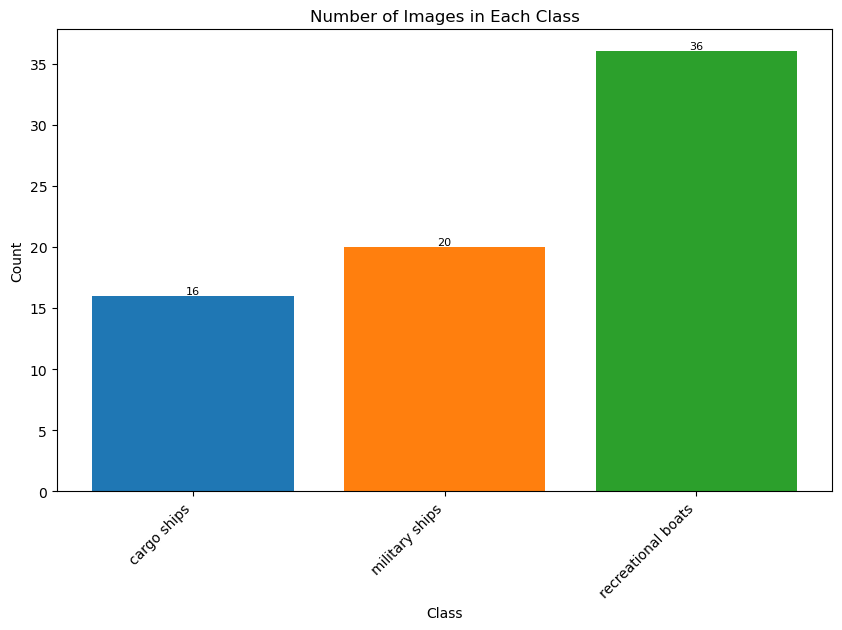

In [14]:
#bar graph
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab10')

# Plot the bar graph with colors
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(class_names, counts, color=cmap.colors)

# Add data labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
            ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')  # Rotate class names for better visibility
plt.show()

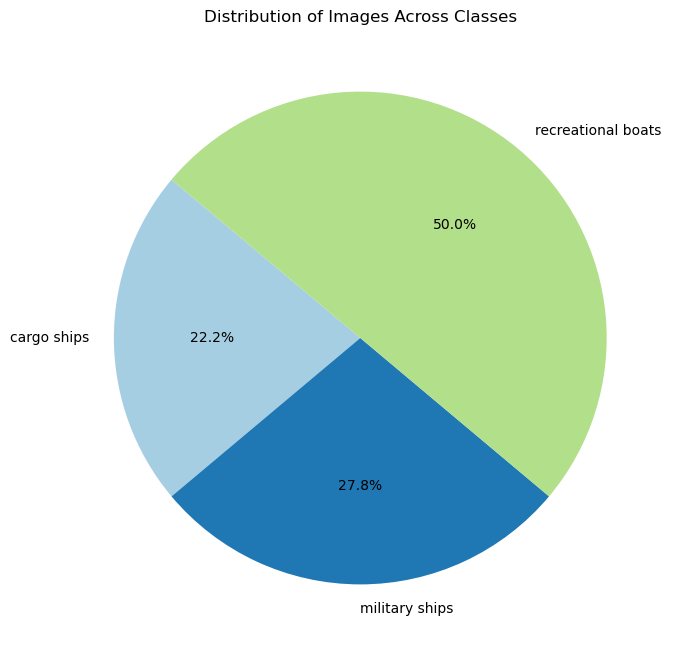

In [15]:
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Images Across Classes')
plt.show()
#set 3 class labels
classes = ["Submarine", "lifeboat", "Boat"]

In [35]:
#Preprocessing to target size of 224,224 - resized to height 224 pixels & width 224 pixels.
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def PREEPROCESSESOR(folder_path="C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study", target_size=(224, 224)):
    # Define your classes here
    classes = ["cargo ships", "military ships", "recreational boats"]
    
    images = []
    labels = []

    for class_label in classes:
        class_path = os.path.join(folder_path, class_label)
        
        if os.path.exists(class_path):
            
            for filename in os.listdir(class_path):
                
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    
                    file_path = os.path.join(class_path, filename)
                    img = image.load_img(file_path, target_size=target_size)
                    img_array = image.img_to_array(img)
                    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
                    images.append(img_array)
                    labels.append(classes.index(class_label))

    return np.array(images), to_categorical(np.array(labels), num_classes=len(classes))

In [36]:
from sklearn.model_selection import train_test_split

# Assuming PREEPROCESSESOR is a function that loads and preprocesses your data
main_folder_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study"  # Adjust the path based on your dataset location

# Load and preprocess the data
images, labels = PREEPROCESSESOR(main_folder_path)

# Check if there are samples in the dataset
if len(images) == 0 or len(labels) == 0:
    raise ValueError("No samples found in the dataset.")
else:
    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=6)

# Display the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Number of images: 72
Number of labels: 72
Training set size: 57
Testing set size: 15


In [37]:
#number of rows and columns in train and test (shape of train and test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 224, 224, 3)
(15, 224, 224, 3)
(57, 3)
(15, 3)


In [38]:
#data types of train and test
print(f'X train dtype: {X_train.dtype}')
print(f'X test dtype: {X_test.dtype}')
print(f'y train dtype: {y_train.dtype}')
print(f'y test dtype: {y_test.dtype}')

X train dtype: float32
X test dtype: float32
y train dtype: float32
y test dtype: float32


In [39]:
#ResNet Model

resnet_model = Sequential()
trained_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

for layer in trained_resnet.layers:
    layer.trainable = False

resnet_model.add( trained_resnet )
resnet_model.add( Flatten() )
resnet_model.add( Dense(512, activation='relu') )
resnet_model.add( Dense(len(classes), activation='softmax') )
resnet_model.compile( optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'] )
history = resnet_model.fit( X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test) )



94765736/94765736 [==============================] - 27s 0us/step
Epoch 1/5


2/2 [==============================] - 7s 2s/step - loss: 3.2181 - accuracy: 0.3158 - val_loss: 2.9721 - val_accuracy: 0.4667
Epoch 2/5
2/2 [==============================] - 2s 1s/step - loss: 4.2002 - accuracy: 0.5439 - val_loss: 1.5649 - val_accuracy: 0.8667
Epoch 3/5
2/2 [==============================] - 3s 2s/step - loss: 2.0430 - accuracy: 0.7193 - val_loss: 0.5264 - val_accuracy: 0.8000
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 0.2218 - accuracy: 0.9474 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 0.0958 - accuracy: 0.9474 - val_loss: 0.6636 - val_accuracy: 0.6667


In [40]:
# Evaluation for test data
loss_test, accuracy_test = resnet_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_test}, Test Accuracy: {accuracy_test}")
# Evaluation for training data
loss_train, accuracy_train = resnet_model.evaluate(X_train, y_train)
print(f"Training Loss: {loss_train}, Training Accuracy: {accuracy_train}")

1/1 [==============================] - 1s 788ms/step - loss: 0.6636 - accuracy: 0.6667
Test Loss: 0.6635882258415222, Test Accuracy: 0.6666666865348816
2/2 [==============================] - 3s 1s/step - loss: 0.3448 - accuracy: 0.8246
Training Loss: 0.344755619764328, Training Accuracy: 0.8245614171028137


In [41]:
# corresponding Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred_resnet = resnet_model.predict(X_test)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_classes_resnet = np.argmax(y_test, axis=1)

conf_matrix_resnet = confusion_matrix(y_true_classes_resnet, y_pred_classes_resnet)
plt.figure(figsize=(8, 6))

1/1 [==============================] - 2s 2s/step


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

1/1 [==============================] - 0s 88ms/step


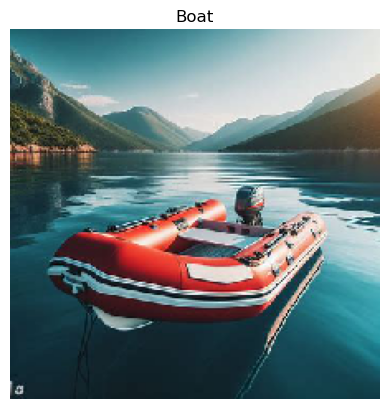

In [43]:
# prediction on new image from dataset (ship,boat,kayak)
new_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study/recreational boats/dinghy2.jpeg"

# Load and preprocess the new image
new_image = image.load_img(new_path, target_size=(224, 224))
new_array = image.img_to_array(new_image)
new_array = np.expand_dims(new_array, axis=0)

#preprocessing
new_array = tf.keras.applications.resnet.preprocess_input(new_array)

# create new resnet model
predictions = resnet_model.predict(new_array)

#predicted class index 
class_index = np.argmax(predictions)
label = classes[class_index]

#new image with corresponding class
plt.imshow(new_image)
plt.title(f"{label}")
plt.axis('off')
plt.show()

In [44]:
print(f'The prediction of the RESNET50 model is "{label}"')
#percentage_accuracy = accuracy_test * 100
print(f'It is produced with {accuracy_test * 100:.2f}% accuracy')

The prediction of the RESNET50 model is "Boat"
It is produced with 66.67% accuracy


In [45]:
# VGG16 Model
vgg16_model = Sequential()
trained_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in trained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(trained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(len(classes), activation='softmax'))
vgg16_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = vgg16_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

58889256/58889256 [==============================] - 17s 0us/step
Epoch 1/5
2/2 [==============================] - 7s 3s/step - loss: 154.0808 - accuracy: 0.3158 - val_loss: 107.6700 - val_accuracy: 0.4667
Epoch 2/5
2/2 [==============================] - 6s 3s/step - loss: 44.3558 - accuracy: 0.7018 - val_loss: 13.6787 - val_accuracy: 0.7333
Epoch 3/5
2/2 [==============================] - 8s 5s/step - loss: 4.3991 - accuracy: 0.9474 - val_loss: 54.0832 - val_accuracy: 0.5333
Epoch 4/5
2/2 [==============================] - 9s 5s/step - loss: 2.5883 - accuracy: 0.9474 - val_loss: 49.2321 - val_accuracy: 0.5333
Epoch 5/5
2/2 [==============================] - 8s 5s/step - loss: 0.1402 - accuracy: 0.9825 - val_loss: 41.8951 - val_accuracy: 0.6667


In [46]:
# Evaluation of VGG16 model
loss, accuracy = vgg16_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Evaluation for training data
loss_train, accuracy_train = vgg16_model.evaluate(X_train, y_train)
print(f"Training Loss: {loss_train}, Training Accuracy: {accuracy_train}")

1/1 [==============================] - 2s 2s/step - loss: 41.8951 - accuracy: 0.6667
Test Loss: 41.895057678222656, Test Accuracy: 0.6666666865348816
2/2 [==============================] - 6s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Training Loss: 0.0, Training Accuracy: 1.0


1/1 [==============================] - 0s 236ms/step


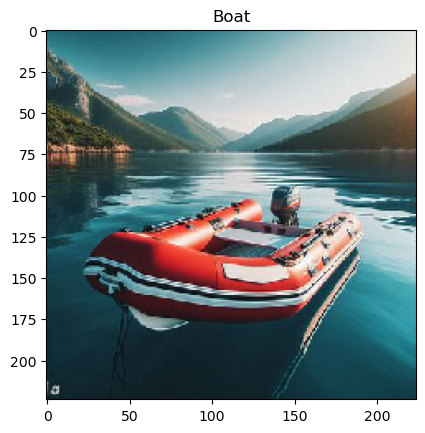

In [48]:
# New Image for VGG16
new_path = "C:/Users/SARI SHREYA/OneDrive/Desktop/dl-case_study/recreational boats/dinghy2.jpeg"

# Load new image
new_image = image.load_img(new_path, target_size=(224, 224))
new_array = image.img_to_array(new_image)
new_array = np.expand_dims(new_array, axis=0)

#preprocess image
new_array = tf.keras.applications.vgg16.preprocess_input(new_array)

# Predict new image using VGG16 model
predictions = vgg16_model.predict(new_array)
class_index = np.argmax(predictions)
label = classes[class_index]

# Image and its class
plt.imshow(new_image)
plt.title(f"{label}")
#plt.axis('off')
plt.show()

In [49]:
print(f'The prediction of the VGG16 model is "{label}"')
#percentage_accuracy = accuracy * 100
print(f'It is produced with {accuracy * 100:.2f}% accuracy')

The prediction of the VGG16 model is "Boat"
It is produced with 66.67% accuracy


In [50]:
#comaprison of RESNET50 AND VGG16 MODEL
# Evaluation for performance on test data 
#RESNET50
loss_test, accuracy_test = resnet_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_test}, Test Accuracy: {accuracy_test}")

#VGG16
loss, accuracy = vgg16_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Evaluation for performance on training data
#RESNET50
loss_train, accuracy_train = resnet_model.evaluate(X_train, y_train)
print(f"Training Loss: {loss_train}, Training Accuracy: {accuracy_train}")

#VGG16
loss_train, accuracy_train = vgg16_model.evaluate(X_train, y_train)
print(f"Training Loss: {loss_train}, Training Accuracy: {accuracy_train}")

1/1 [==============================] - 1s 667ms/step - loss: 0.6636 - accuracy: 0.6667
Test Loss: 0.6635882258415222, Test Accuracy: 0.6666666865348816
1/1 [==============================] - 1s 1s/step - loss: 41.8951 - accuracy: 0.6667
Test Loss: 41.895057678222656, Test Accuracy: 0.6666666865348816
2/2 [==============================] - 2s 795ms/step - loss: 0.3448 - accuracy: 0.8246
Training Loss: 0.344755619764328, Training Accuracy: 0.8245614171028137
2/2 [==============================] - 4s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Training Loss: 0.0, Training Accuracy: 1.0


In [51]:
#MODEL VS INPUT IMAGE VS OUTPUT label VS TEST ACCURACY VS LOSS

print('  MODEL        LABEL       TEST ACCURACY      TEST LOSS ')
print('_'*57)
print(f'RESNET50 |\t{label}\t|\t{accuracy_test * 100:.2f}%\t|\t{loss_test * 100:.2f}% \t|')
print('_'*57)
print(f'VGG16    |\t{label}\t|\t{accuracy * 100:.2f}%\t|\t{loss * 10:.2f}%\t|')
print('_'*57)

  MODEL        LABEL       TEST ACCURACY      TEST LOSS 
_________________________________________________________
RESNET50 |	Boat	|	66.67%	|	66.36% 	|
_________________________________________________________
VGG16    |	Boat	|	66.67%	|	418.95%	|
_________________________________________________________


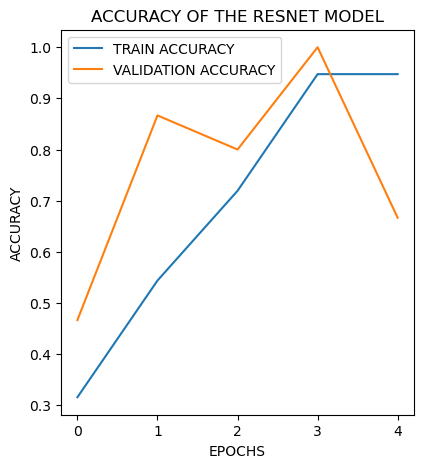

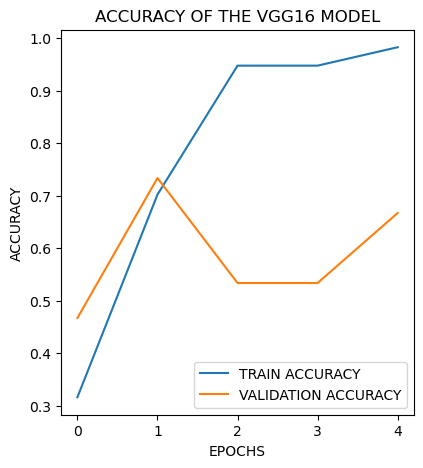

In [52]:
#TRAIN LOSS AND ACCURACY WITH PLOTS (ResNet Model)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

#ACCURACY
plt.plot(history.history['accuracy'], label='TRAIN ACCURACY')
plt.plot(history.history['val_accuracy'], label='VALIDATION ACCURACY')

#PLOT OF EPOCHS VS ACCURACY
plt.title('ACCURACY OF THE RESNET MODEL')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

#TRAIN LOSS AND ACCURACY WITH PLOTS (VGG16 model)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

#ACCURACY
plt.plot(history_vgg16.history['accuracy'], label='TRAIN ACCURACY')
plt.plot(history_vgg16.history['val_accuracy'], label='VALIDATION ACCURACY')

#PLOT OF EPOCHS VS ACCURACY
plt.title('ACCURACY OF THE VGG16 MODEL')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

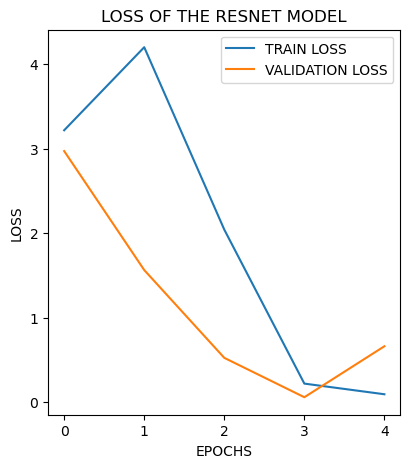

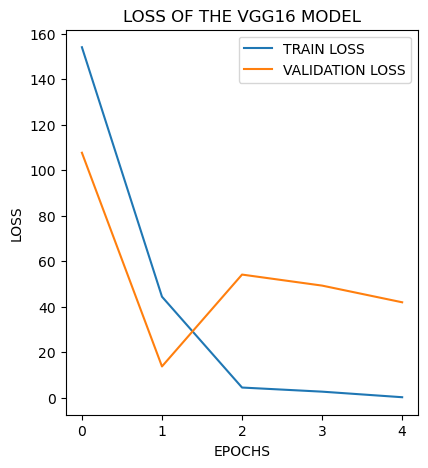

In [53]:
#LOSS
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='TRAIN LOSS')
plt.plot(history.history['val_loss'], label='VALIDATION LOSS')

#PLOT OF EPOCHS VS LOSS
plt.title('LOSS OF THE RESNET MODEL')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()

plt.show()

#LOSS
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='TRAIN LOSS')
plt.plot(history_vgg16.history['val_loss'], label='VALIDATION LOSS')

#PLOT OF EPOCHS VS LOSS
plt.title('LOSS OF THE VGG16 MODEL')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()

plt.show()

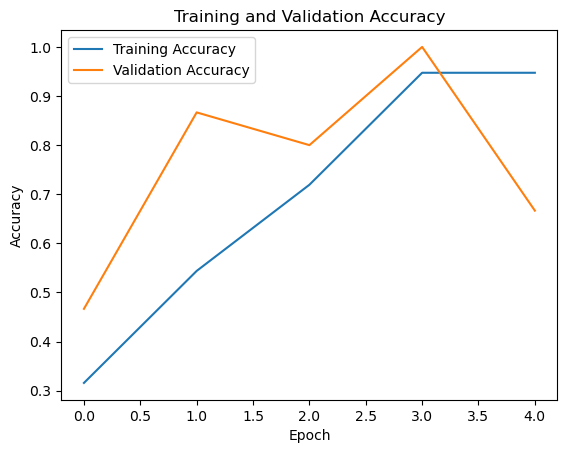

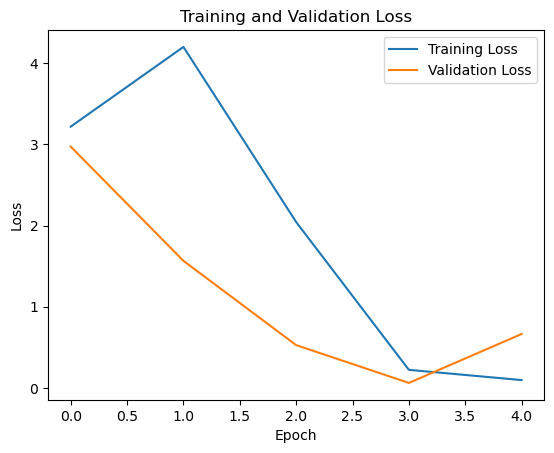

In [54]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()